In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

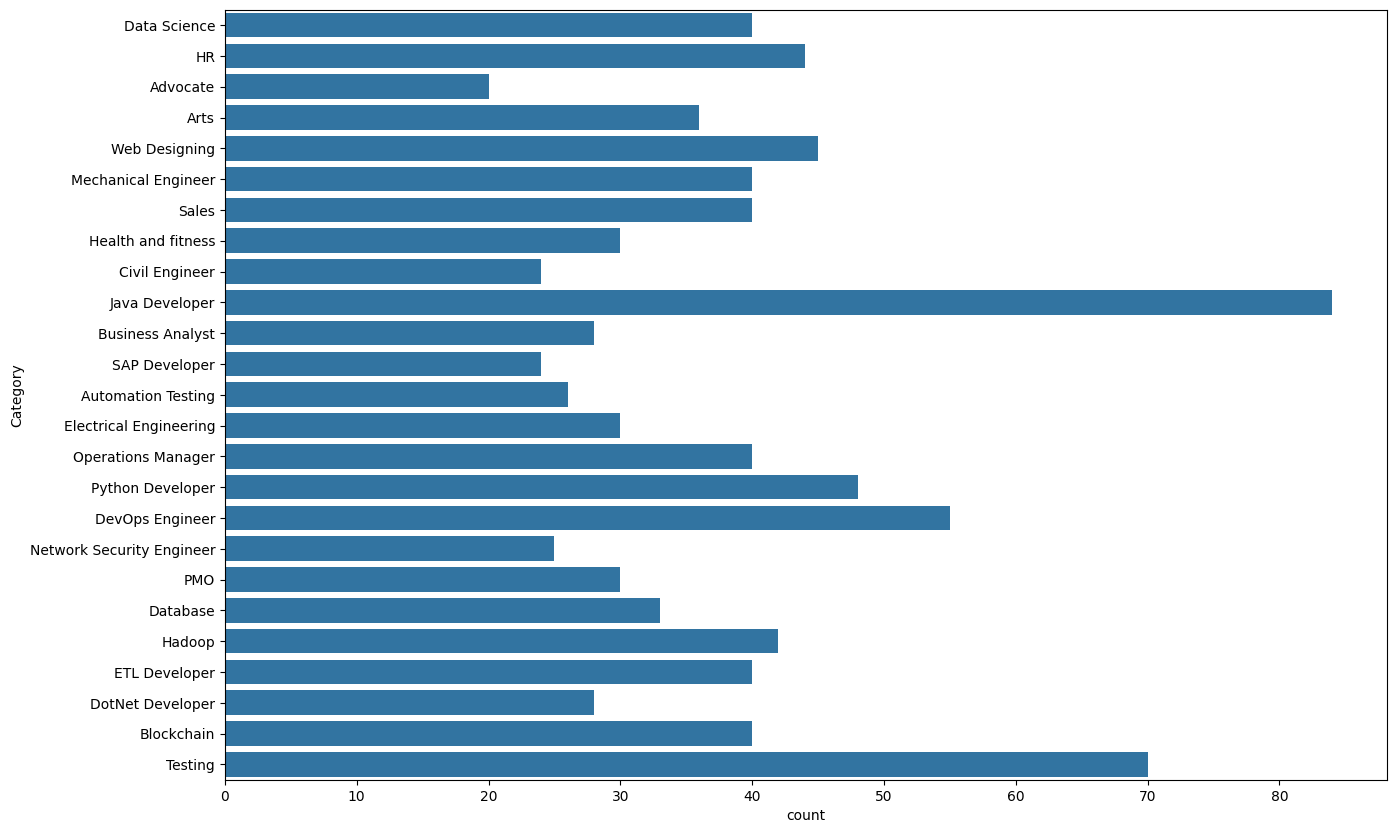

In [6]:
plt.figure(figsize=(15, 10))
sns.countplot(df['Category'])
plt.show()

In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

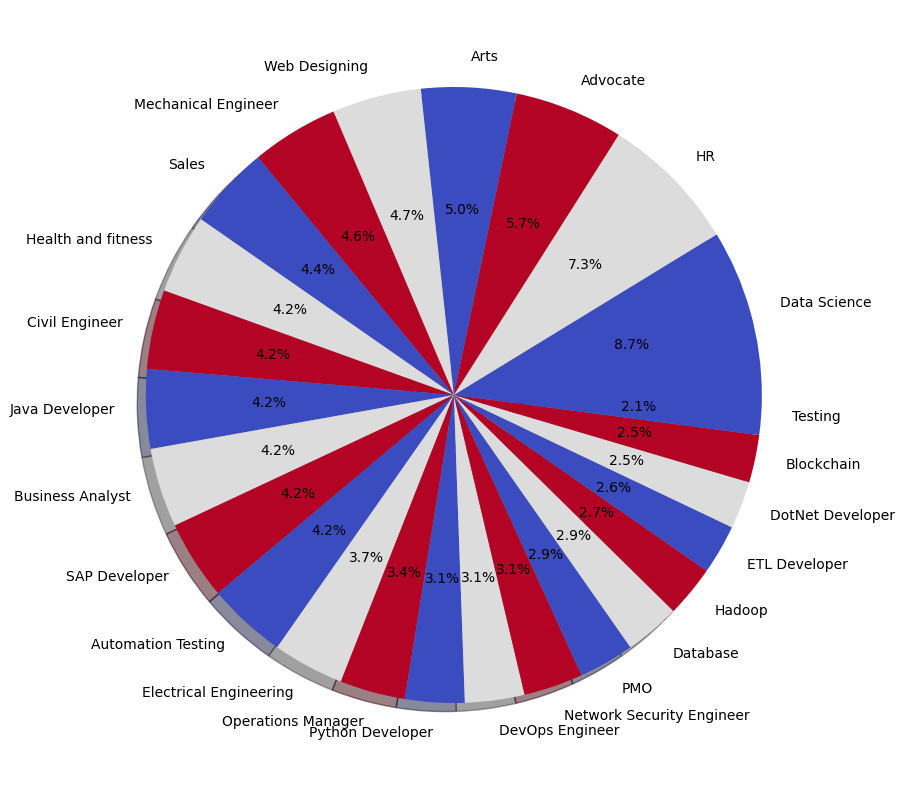

In [8]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15, 10))
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True,
        colors=plt.cm.coolwarm(np.linspace(0, 1, 3)))
plt.show()

In [9]:
df['Category'][0]

'Data Science'

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [11]:
import re


def clean_resume(txt):
    """
    Clean a resume text by removing unnecessary information such as URLs, hashtags, mentions, extra whitespaces, and special characters.

    Args:
        txt (str): The input text to clean.

    Returns:
        str: The cleaned text.
    """
    # Remove URLs
    cleaned_text = re.sub(r'http\S+', ' ', txt)

    # Remove underscore
    cleaned_text = re.sub('_', ' ', cleaned_text)

    # Remove RT and CC
    cleaned_text = re.sub(r'RT|CC', ' ', cleaned_text)

    # Remove hashtags
    cleaned_text = re.sub(r'#\S+\s', ' ', cleaned_text)

    # Remove mentions
    cleaned_text = re.sub(r'@\S+', ' ', cleaned_text)

    # Remove extra whitespaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

    # Remove special characters
    cleaned_text = re.sub(r'[^\w\s]', ' ', cleaned_text)

    # Remove non-ASCII characters
    cleaned_text = re.sub(r'[^\x00-\x7f]', ' ', cleaned_text)

    return cleaned_text

In [12]:
clean_resume(" @hello # smit$ name of the class_http://topper")

'   smit  name of the class '

In [13]:
df['Resume'] = df['Resume'].apply(lambda x: clean_resume(x))

In [14]:
df['Resume']

0      Skills   Programming Languages  Python  pandas...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning  Control Syste...
3      Skills     R     Python     SAP HANA     Table...
4      Education Details MCA YMCAUST  Faridabad  Hary...
                             ...                        
957    Computer Skills      Proficient in MS office  ...
958        Willingness to accept the challenges      ...
959    PERSONAL SKILLS     Quick learner      Eagerne...
960    COMPUTER SKILLS   SOFTWARE KNOWLEDGE MS Power ...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit(df['Category'])
# Convert the categorical data to numerical values
df['Category'] = le.transform(df['Category'])

In [17]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control Syste...
3,6,Skills R Python SAP HANA Table...
4,6,Education Details MCA YMCAUST Faridabad Hary...
...,...,...
957,23,Computer Skills Proficient in MS office ...
958,23,Willingness to accept the challenges ...
959,23,PERSONAL SKILLS Quick learner Eagerne...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power ...


In [18]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [19]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#  'Mechanical Engineer', 'Sales', 'Health and fitness',
#  'Civil Engineer', 'Java Developer', 'Business Analyst',
#  'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#  'Operations Manager', 'Python Developer', 'DevOps Engineer',
#  'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#  'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

In [21]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control Syste...
3,6,Skills R Python SAP HANA Table...
4,6,Education Details MCA YMCAUST Faridabad Hary...
...,...,...
957,23,Computer Skills Proficient in MS office ...
958,23,Willingness to accept the challenges ...
959,23,PERSONAL SKILLS Quick learner Eagerne...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power ...


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    requiredText, df['Category'], test_size=0.2, random_state=100)

In [24]:
X_test.shape

(193, 7339)

In [25]:
X_train.shape

(769, 7339)

In [26]:
# this is multi classification problem

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9792746113989638


In [28]:
import pickle

pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))
model = pickle.load(open('clf.pkl', 'rb'))

In [29]:
input_data = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [30]:

cleaned_resume = clean_resume(input_data)
input_features = tfidf.transform([cleaned_resume])
predictions = model.predict(input_features)
predictions_list = predictions.tolist()
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}
1
category_name = category_mapping.get(predictions_list[0], "Unknown")

print("Predicted Category:", category_name)
print(predictions_list)

Predicted Category: Data Science
[6]
